In [5]:
!ls /data/restore_speed/

c4_restore_speed_matrix.csv	   vipin_c4_restore_speed_matrix.csv
c6_restore_speed_matrix.csv	   vipin_c5_restore_speed_matrix.csv
c9_restore_speed_matrix.csv	   vipin_c6_restore_speed_matrix.csv
n15_c4_restore_speed_matrix.csv    vipin_c7_restore_speed_matrix.csv
vipin_c1_restore_speed_matrix.csv  vipin_c9_restore_speed_matrix.csv
vipin_c2_restore_speed_matrix.csv  vipin_merged_restore_speed_matrix.csv
vipin_c3_restore_speed_matrix.csv


In [16]:

# coding: utf-8

# ### This notebook explores how variables like running tasks, CPU and memory utilization impacts the restore speed

# In[1]:

DATA_FILE_PATH = "/data/restore_speed/vipin_merged_restore_speed_matrix.csv"


import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.set(style="white")

data = pd.read_csv(DATA_FILE_PATH)
data['etime'] = pd.to_datetime(data['etime'], unit='s')
data = data.set_index('etime',drop=True)
data = data.drop('duration',axis=1)
print ('data shape : %s' % str(data.shape))

data shape : (6834, 9)


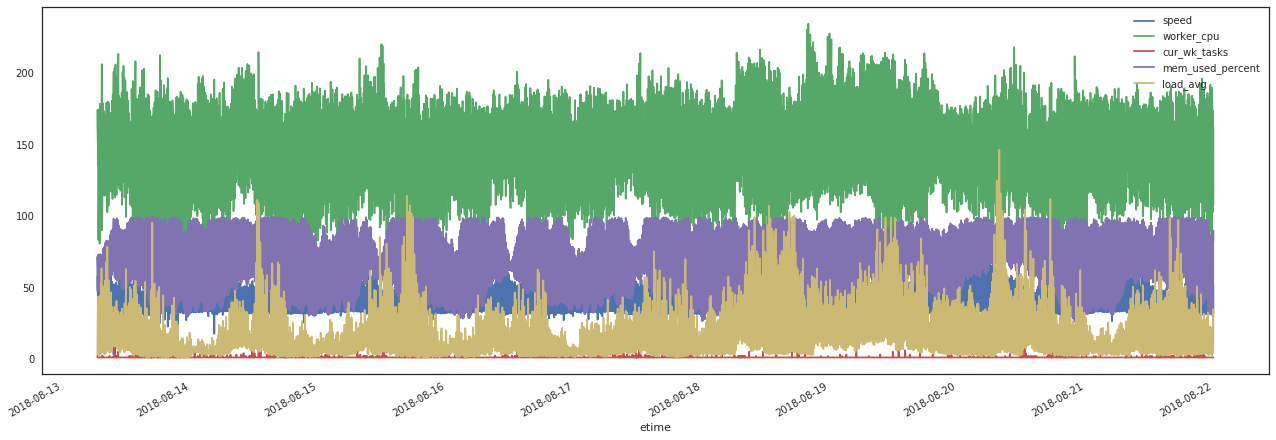

In [9]:
data[['speed', 'worker_cpu', 'cur_wk_tasks', 'mem_used_percent', 'load_avg']].plot(figsize=(22,7.5))

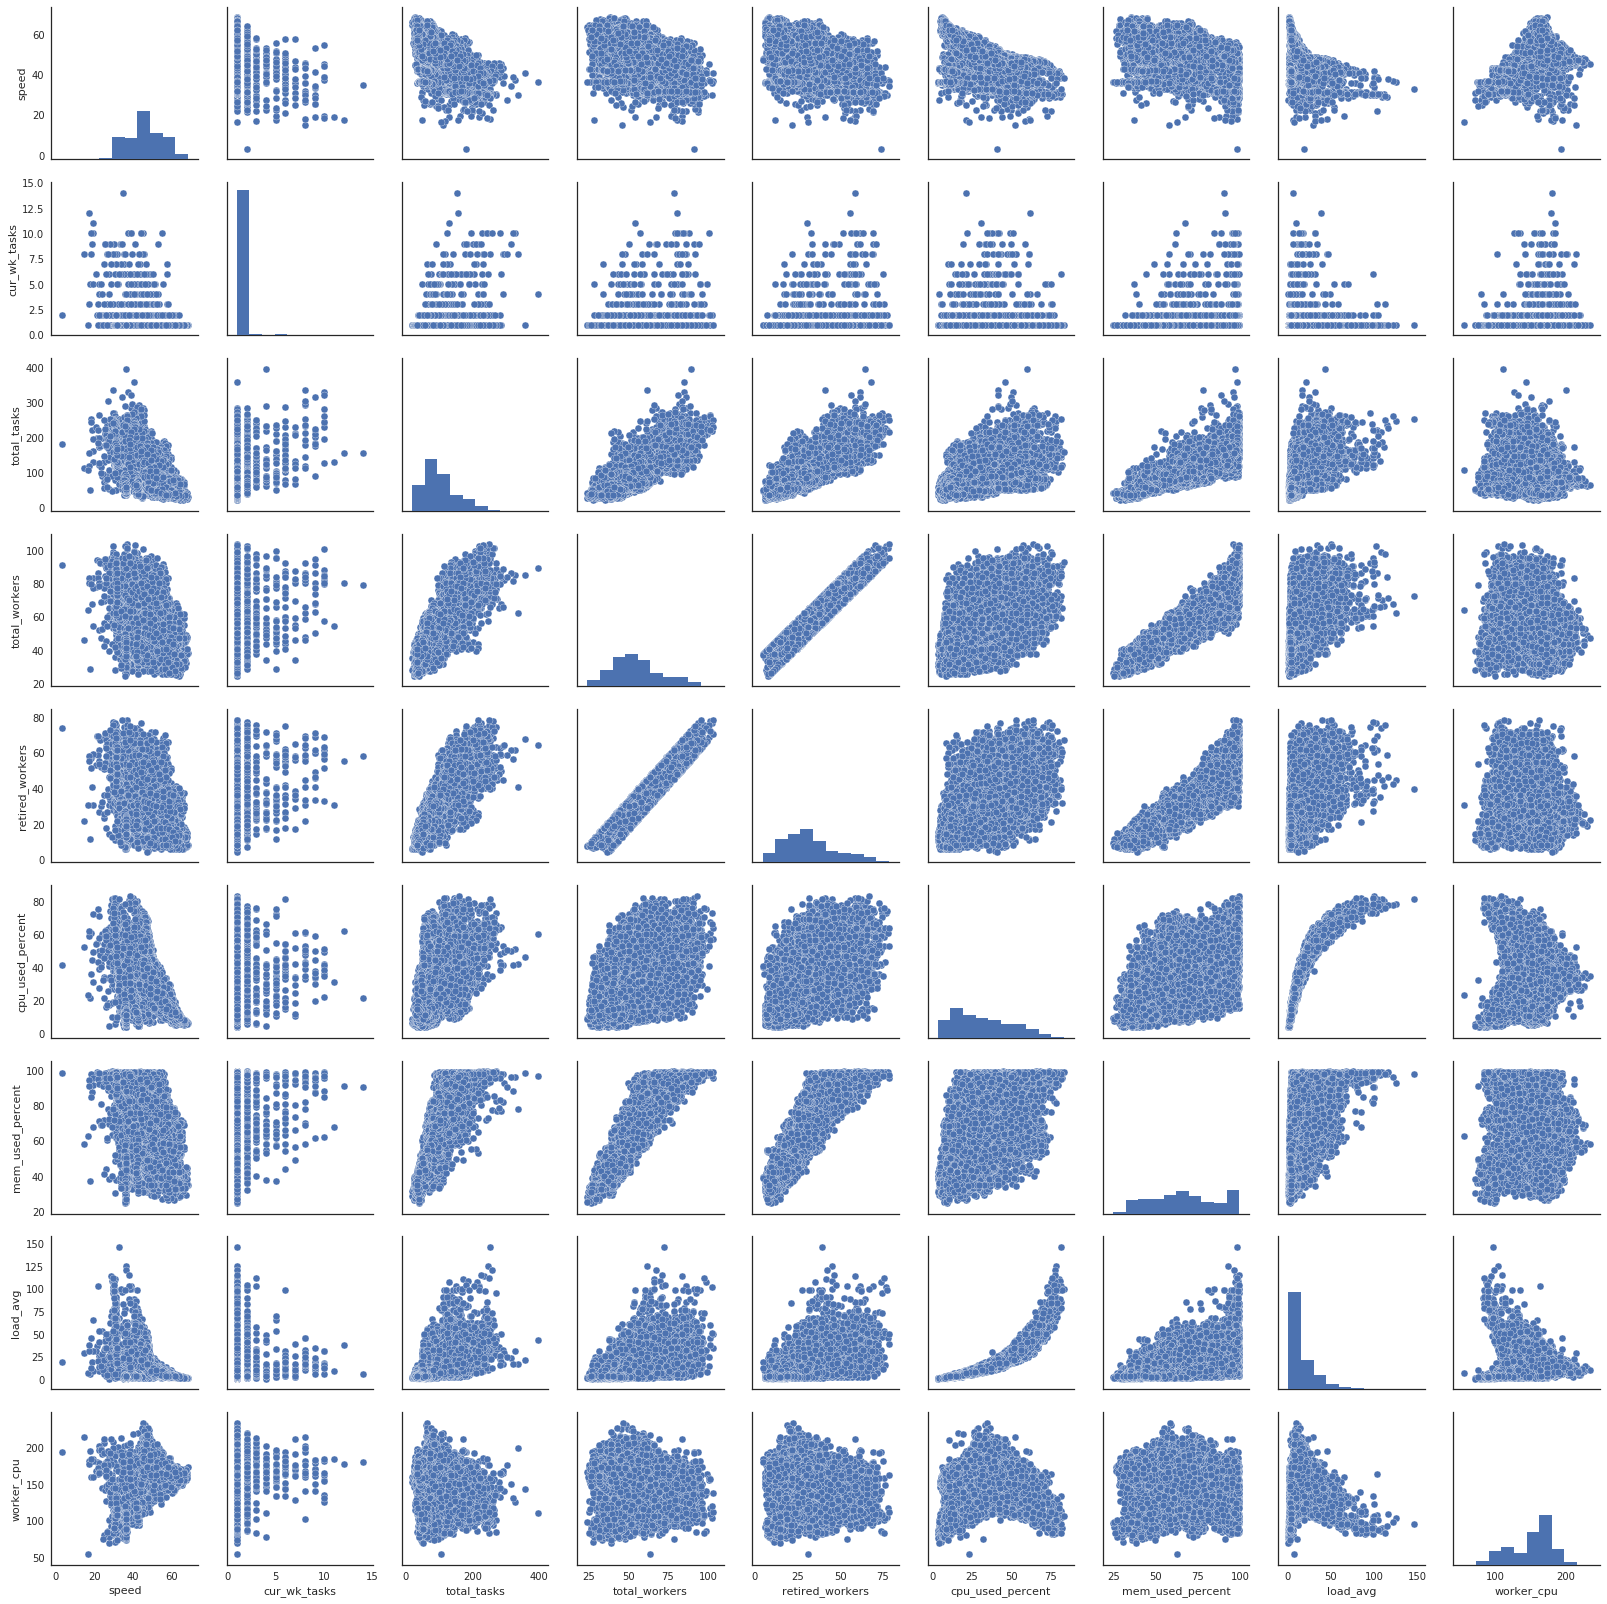

In [10]:
sns.pairplot(data)

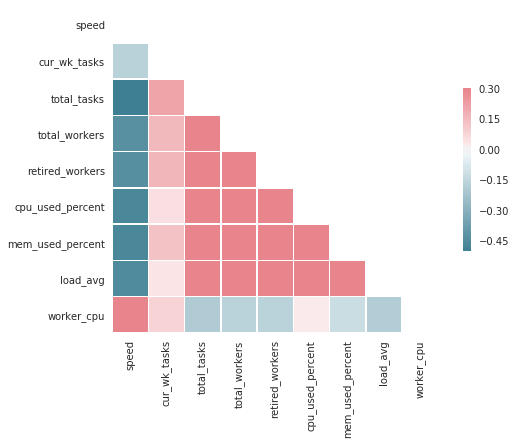

In [11]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 6))
#f, ax = plt.subplots(figsize=(11, 11))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Cross validation Scores are:
-4.169414 +/- 0.251910
------------------------------------------------------------------------------------------------------------------------------------------------------


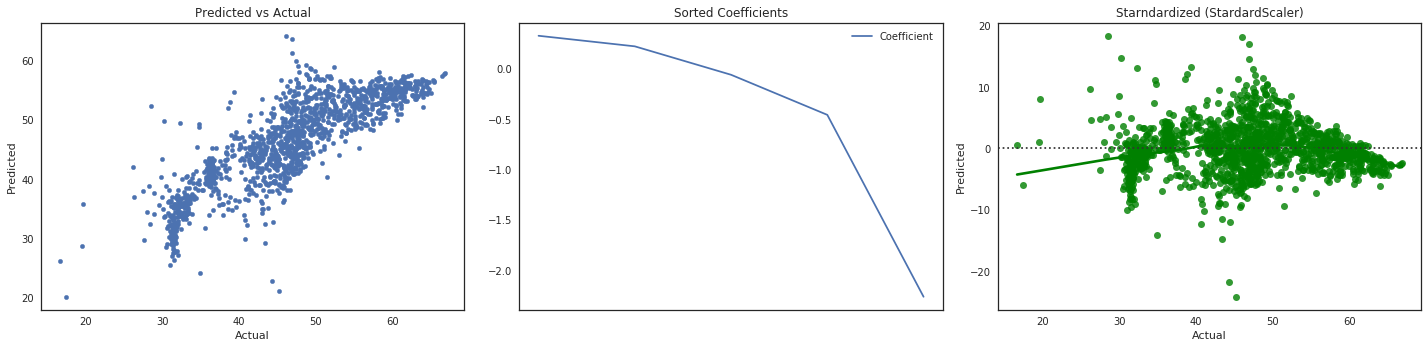

In [12]:
features_data = data[['cur_wk_tasks','worker_cpu','cpu_used_percent','mem_used_percent','load_avg']]
#features_data = data[['cur_wk_tasks','worker_cpu','cpu_used_percent','mem_used_percent','load_avg','total_tasks', 'total_workers']]
target = data['speed']
random_state = np.random.randint(1, 100)

model = linear_model.LinearRegression()
cross_val_scores = cross_val_score(model, features_data, target, scoring = 'neg_mean_absolute_error',cv=4)
print ('Cross validation Scores are:' % cross_val_scores)
print ('%f +/- %f'%(np.mean(cross_val_scores),np.std(cross_val_scores)))
print ('-'*150)

X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=0.2, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
data_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

fig, ax = plt.subplots(figsize=(20,5), ncols=3, nrows=1)

ax[0].set_title("Predicted vs Actual")
ax[1].set_title("Sorted Coefficients",)
ax[2].set_title("Starndardized (StardardScaler)")

data_pred.plot.scatter(x='Actual', y='Predicted',ax=ax[0]);
pd.DataFrame(model.coef_, features_data.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False).plot(ax=ax[1])
sns.residplot(data_pred['Actual'], data_pred['Predicted'], lowess=True, color="g",ax=ax[2])

plt.tight_layout()

Cross validation Scores are:
-2.448471 +/- 0.015650
------------------------------------------------------------------------------------------------------------------------------------------------------


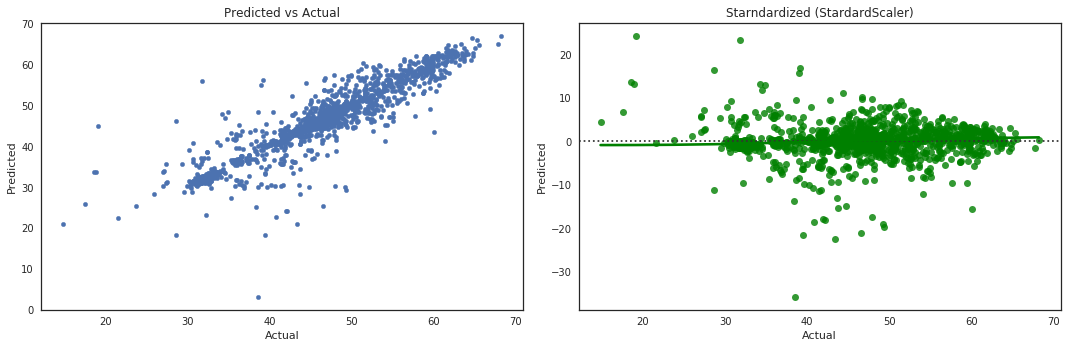

In [18]:
features_data = data[['cur_wk_tasks','worker_cpu','cpu_used_percent','mem_used_percent','load_avg']]
#features_data = data[['cur_wk_tasks','worker_cpu','cpu_used_percent','mem_used_percent','load_avg','total_tasks', 'total_workers']]
target = data['speed']
random_state = np.random.randint(1, 100)

model = DecisionTreeRegressor(random_state=222)
cross_val_scores = cross_val_score(model, features_data, target, scoring = 'neg_mean_absolute_error',cv=4)
print ('Cross validation Scores are:' % cross_val_scores)
print ('%f +/- %f'%(np.mean(cross_val_scores),np.std(cross_val_scores)))
print ('-'*150)

X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=0.2, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
data_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1)

ax[0].set_title("Predicted vs Actual")
ax[1].set_title("Starndardized (StardardScaler)")

data_pred.plot.scatter(x='Actual', y='Predicted',ax=ax[0]);
sns.residplot(data_pred['Actual'], data_pred['Predicted'], lowess=True, color="g",ax=ax[1])

plt.tight_layout()

In [26]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print "} else {"
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print "}"
                else:
                        print "return " + str(value[node])

        recurse(left, right, threshold, features, 0)

In [27]:
get_code(model,features_data.columns)

if ( worker_cpu <= 140.64024353027344 ) {
if ( mem_used_percent <= 66.95999908447266 ) {
if ( worker_cpu <= 100.39497375488281 ) {
if ( cpu_used_percent <= 20.724998474121094 ) {
if ( mem_used_percent <= 59.88500213623047 ) {
if ( worker_cpu <= 98.55455017089844 ) {
if ( cpu_used_percent <= 16.0 ) {
if ( mem_used_percent <= 50.974998474121094 ) {
if ( worker_cpu <= 82.25262451171875 ) {
if ( cpu_used_percent <= 9.420000076293945 ) {
if ( worker_cpu <= 81.99916076660156 ) {
if ( worker_cpu <= 78.08261108398438 ) {
if ( load_avg <= 1.7350000143051147 ) {
if ( load_avg <= 1.0850000381469727 ) {
return [[35.67906068]]
} else {
if ( load_avg <= 1.2999999523162842 ) {
if ( worker_cpu <= 76.92955017089844 ) {
return [[36.47669263]]
} else {
return [[36.4921284]]
}
} else {
if ( load_avg <= 1.6400001049041748 ) {
if ( load_avg <= 1.4450000524520874 ) {
return [[36.33446288]]
} else {
return [[36.33651157]]
}
} else {
return [[36.18236256]]
}
}
}
} else {
if ( load_avg <= 1.965000033378601 ) {


return [[40.11767266]]
} else {
if ( mem_used_percent <= 59.470001220703125 ) {
return [[40.05757712]]
} else {
return [[40.02201822]]
}
}
}
} else {
return [[40.70710471]]
}
} else {
return [[39.48362538]]
}
}
} else {
if ( cpu_used_percent <= 21.900001525878906 ) {
return [[44.73116401]]
} else {
if ( mem_used_percent <= 59.21500015258789 ) {
if ( mem_used_percent <= 51.69999694824219 ) {
if ( worker_cpu <= 131.2691650390625 ) {
return [[40.19177948]]
} else {
return [[40.21424588]]
}
} else {
return [[39.28502099]]
}
} else {
if ( load_avg <= 6.890000343322754 ) {
return [[41.26878265]]
} else {
return [[41.38366601]]
}
}
}
}
}
} else {
if ( worker_cpu <= 131.63722229003906 ) {
if ( worker_cpu <= 127.06500244140625 ) {
if ( load_avg <= 4.845000267028809 ) {
return [[41.07822605]]
} else {
return [[40.70560628]]
}
} else {
return [[40.23049595]]
}
} else {
return [[45.05921123]]
}
}
} else {
return [[43.6878034]]
}
} else {
if ( worker_cpu <= 122.61067962646484 ) {
return [[35.959688

if ( worker_cpu <= 112.20599365234375 ) {
if ( mem_used_percent <= 92.93000030517578 ) {
if ( load_avg <= 34.75499725341797 ) {
return [[31.50723552]]
} else {
if ( mem_used_percent <= 88.58000183105469 ) {
return [[31.47627599]]
} else {
return [[31.45798208]]
}
}
} else {
return [[31.14266903]]
}
} else {
if ( mem_used_percent <= 93.4800033569336 ) {
return [[31.62634929]]
} else {
return [[31.88008541]]
}
}
} else {
if ( cpu_used_percent <= 57.13500213623047 ) {
return [[31.4085757]]
} else {
return [[31.08749647]]
}
}
}
}
} else {
if ( cpu_used_percent <= 51.48500061035156 ) {
if ( load_avg <= 29.154998779296875 ) {
if ( load_avg <= 24.81999969482422 ) {
return [[31.33427827]]
} else {
return [[31.18756945]]
}
} else {
return [[31.49096823]]
}
} else {
if ( load_avg <= 30.485000610351562 ) {
return [[30.89040673]]
} else {
if ( mem_used_percent <= 95.43499755859375 ) {
return [[30.93992103]]
} else {
return [[30.97077398]]
}
}
}
}
} else {
if ( cpu_used_percent <= 58.90999984741211

} else {
if ( mem_used_percent <= 51.88500213623047 ) {
return [[66.6070703]]
} else {
return [[66.42800092]]
}
}
} else {
return [[66.03568978]]
}
} else {
if ( mem_used_percent <= 59.095001220703125 ) {
return [[64.48011601]]
} else {
if ( mem_used_percent <= 67.04499816894531 ) {
return [[65.00920649]]
} else {
return [[65.06788783]]
}
}
}
}
}
}
} else {
if ( mem_used_percent <= 60.285003662109375 ) {
if ( cpu_used_percent <= 6.659999847412109 ) {
if ( mem_used_percent <= 38.584999084472656 ) {
if ( load_avg <= 1.7799999713897705 ) {
return [[68.31408237]]
} else {
return [[68.51808576]]
}
} else {
return [[68.00022303]]
}
} else {
if ( load_avg <= 1.8250000476837158 ) {
if ( mem_used_percent <= 42.019996643066406 ) {
if ( cpu_used_percent <= 6.699999809265137 ) {
return [[67.57341204]]
} else {
return [[66.89406115]]
}
} else {
if ( cpu_used_percent <= 6.929999828338623 ) {
return [[67.82884252]]
} else {
return [[68.0936546]]
}
}
} else {
if ( mem_used_percent <= 36.20000076293945

}
} else {
if ( load_avg <= 5.085000038146973 ) {
if ( worker_cpu <= 163.76071166992188 ) {
return [[57.83712418]]
} else {
return [[56.7886368]]
}
} else {
if ( cpu_used_percent <= 15.850000381469727 ) {
return [[54.04476772]]
} else {
if ( mem_used_percent <= 42.14500045776367 ) {
if ( worker_cpu <= 163.586669921875 ) {
return [[55.05809573]]
} else {
return [[54.92541153]]
}
} else {
if ( cpu_used_percent <= 17.049999237060547 ) {
return [[55.4773848]]
} else {
return [[55.63006989]]
}
}
}
}
}
} else {
if ( mem_used_percent <= 37.37999725341797 ) {
if ( mem_used_percent <= 34.63999938964844 ) {
if ( mem_used_percent <= 33.584999084472656 ) {
if ( cpu_used_percent <= 17.259998321533203 ) {
if ( load_avg <= 4.875 ) {
return [[59.40647313]]
} else {
if ( load_avg <= 5.244999885559082 ) {
return [[59.04382097]]
} else {
return [[59.05002143]]
}
}
} else {
return [[57.96271992]]
}
} else {
if ( load_avg <= 5.265000343322754 ) {
return [[57.13044634]]
} else {
return [[57.7187413]]
}
}
} 

}
} else {
if ( load_avg <= 6.105000019073486 ) {
if ( cpu_used_percent <= 19.329999923706055 ) {
return [[44.54645943]]
} else {
return [[48.3169118]]
}
} else {
if ( worker_cpu <= 159.43618774414062 ) {
if ( mem_used_percent <= 71.02499389648438 ) {
if ( load_avg <= 7.179999828338623 ) {
return [[56.68485403]]
} else {
return [[56.35024899]]
}
} else {
if ( worker_cpu <= 155.86729431152344 ) {
return [[53.31326258]]
} else {
return [[55.28992847]]
}
}
} else {
if ( mem_used_percent <= 71.55999755859375 ) {
if ( mem_used_percent <= 66.30500030517578 ) {
if ( worker_cpu <= 164.74334716796875 ) {
return [[53.69137907]]
} else {
if ( load_avg <= 6.195000171661377 ) {
return [[52.50542397]]
} else {
return [[52.5069069]]
}
}
} else {
if ( load_avg <= 6.545000076293945 ) {
if ( worker_cpu <= 165.1058349609375 ) {
return [[51.81457262]]
} else {
return [[51.2986615]]
}
} else {
if ( worker_cpu <= 172.67813110351562 ) {
return [[52.25742201]]
} else {
return [[52.34452639]]
}
}
}
} else {
if

return [[50.03670422]]
}
} else {
return [[50.97216316]]
}
} else {
if ( load_avg <= 11.710000038146973 ) {
if ( mem_used_percent <= 36.375 ) {
return [[48.05824828]]
} else {
return [[48.10620941]]
}
} else {
return [[50.26001479]]
}
}
} else {
if ( mem_used_percent <= 38.56999969482422 ) {
if ( worker_cpu <= 185.73666381835938 ) {
if ( mem_used_percent <= 38.14500045776367 ) {
return [[53.24803142]]
} else {
return [[52.96187466]]
}
} else {
return [[52.19053503]]
}
} else {
if ( load_avg <= 10.850000381469727 ) {
return [[48.1424653]]
} else {
return [[51.2427288]]
}
}
}
} else {
if ( worker_cpu <= 177.32647705078125 ) {
return [[46.31816345]]
} else {
if ( load_avg <= 11.309999465942383 ) {
return [[48.28505003]]
} else {
return [[47.58719528]]
}
}
}
} else {
if ( worker_cpu <= 177.27195739746094 ) {
if ( mem_used_percent <= 43.71500015258789 ) {
if ( mem_used_percent <= 42.08000183105469 ) {
return [[56.98567382]]
} else {
return [[55.34209027]]
}
} else {
if ( mem_used_percent <=

} else {
return [[41.14410696]]
}
}
} else {
if ( load_avg <= 41.24500274658203 ) {
if ( mem_used_percent <= 77.61500549316406 ) {
return [[42.31828943]]
} else {
return [[42.62182062]]
}
} else {
return [[43.02709278]]
}
}
} else {
if ( load_avg <= 35.40999984741211 ) {
if ( cpu_used_percent <= 43.95500183105469 ) {
if ( cpu_used_percent <= 41.540000915527344 ) {
return [[43.67386741]]
} else {
return [[43.56624218]]
}
} else {
if ( worker_cpu <= 143.40249633789062 ) {
if ( mem_used_percent <= 98.62000274658203 ) {
if ( cpu_used_percent <= 55.53499984741211 ) {
if ( worker_cpu <= 143.02789306640625 ) {
if ( worker_cpu <= 142.322509765625 ) {
if ( load_avg <= 32.970001220703125 ) {
return [[40.55857146]]
} else {
return [[40.51058147]]
}
} else {
return [[40.20837334]]
}
} else {
if ( load_avg <= 21.489999771118164 ) {
return [[41.14684633]]
} else {
if ( cpu_used_percent <= 46.165000915527344 ) {
return [[40.81151945]]
} else {
return [[40.68974619]]
}
}
}
} else {
if ( worker_cpu <= 

}
}
} else {
if ( worker_cpu <= 167.42059326171875 ) {
return [[48.10877276]]
} else {
if ( worker_cpu <= 169.26763916015625 ) {
return [[48.37549916]]
} else {
if ( load_avg <= 16.700000762939453 ) {
return [[48.17716145]]
} else {
return [[48.2312166]]
}
}
}
}
}
}
} else {
return [[46.32689355]]
}
} else {
if ( worker_cpu <= 174.48236083984375 ) {
return [[50.86290592]]
} else {
if ( mem_used_percent <= 52.974998474121094 ) {
return [[48.98020298]]
} else {
if ( worker_cpu <= 175.14486694335938 ) {
return [[49.35971432]]
} else {
if ( mem_used_percent <= 64.1449966430664 ) {
return [[49.46068146]]
} else {
return [[49.52967985]]
}
}
}
}
}
}
} else {
if ( worker_cpu <= 176.5851287841797 ) {
return [[46.30094198]]
} else {
return [[44.82225653]]
}
}
}
} else {
if ( mem_used_percent <= 67.27999877929688 ) {
if ( mem_used_percent <= 66.70500183105469 ) {
if ( worker_cpu <= 190.10018920898438 ) {
if ( worker_cpu <= 180.69430541992188 ) {
if ( cpu_used_percent <= 43.334999084472656 ) {
if 

} else {
if ( load_avg <= 15.850000381469727 ) {
if ( worker_cpu <= 182.7191162109375 ) {
if ( load_avg <= 15.760000228881836 ) {
return [[44.65461288]]
} else {
return [[44.49318349]]
}
} else {
return [[45.12532222]]
}
} else {
if ( mem_used_percent <= 80.3499984741211 ) {
if ( cpu_used_percent <= 40.23500061035156 ) {
if ( worker_cpu <= 183.63333129882812 ) {
return [[45.32146283]]
} else {
if ( cpu_used_percent <= 38.43499755859375 ) {
return [[45.03654112]]
} else {
return [[45.09633143]]
}
}
} else {
if ( mem_used_percent <= 71.0250015258789 ) {
if ( load_avg <= 16.110000610351562 ) {
return [[45.60560642]]
} else {
return [[45.4338878]]
}
} else {
if ( load_avg <= 16.439998626708984 ) {
return [[45.70223254]]
} else {
return [[45.67548805]]
}
}
}
} else {
if ( cpu_used_percent <= 39.125 ) {
return [[45.79561973]]
} else {
return [[46.18103188]]
}
}
}
}
}
}
} else {
if ( load_avg <= 17.104999542236328 ) {
if ( load_avg <= 16.954999923706055 ) {
if ( cpu_used_percent <= 38.9449996